In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from dataset_class.EDA import EDA

I will be attempting an Exploratory Data Analysis of the lending-club dataset. Specifically, I will be focusing on identifying key variables that might predict the default rate so that in the future, a model may be built on this work.

First, we need to load the dataset into the EDA class which will handle the cleaning and graphing for us. Let's take a preliminary look at the data

In [2]:
data = EDA("accepted_2007_to_2018Q4.csv","rejected_2007_to_2018Q4.csv")
data.data_info()

C:\Users\jaipa\miniconda3\envs\zest\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


That takes up a lot of space! There's 151 columns and 2 million entries, and that's just in the accepted data set. Let's clean this up by removing columns that are not relevent to default analysis like 'title', as well as columns that have over 10% of their data missing. We'll also remove rows that are missing key values in 'emp_length' and 'revol_util' that we assume might have a significant impact on creditworthiness from the get-go. From this final dataframe, we'll restrict ourselves to the first 23 columns, as we have a limited amount of time and space for this analysis.

In [3]:
data.raw_clean_up()
data.data_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112110 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   funded_amnt_inv      float64
 2   term                 object 
 3   int_rate             float64
 4   installment          float64
 5   grade                object 
 6   sub_grade            object 
 7   emp_length           object 
 8   home_ownership       object 
 9   annual_inc           float64
 10  verification_status  object 
 11  issue_d              object 
 12  loan_status          object 
 13  purpose              object 
 14  dti                  float64
 15  earliest_cr_line     object 
 16  fico_range_low       float64
 17  fico_range_high      float64
 18  inq_last_6mths       float64
 19  open_acc             float64
 20  pub_rec              float64
 21  revol_util           float64
 22  total_acc            float64
dtypes: float64(13), object(10)
memor

Let's look at the overall data. What is the status of accepted loans?

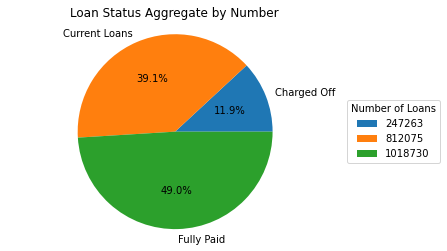

In [4]:
data.loan_defaults()

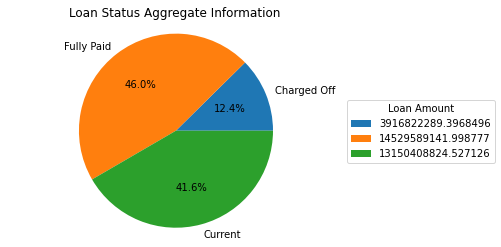

In [5]:
data.loan_defaults_by_amount()

It looks like by numbers or by amount, a large percentage of loans are still ongoing, and so we have to exclude them from the analysis. Also, fully paid loans are fewer in number, but have a higher share of the tital value of loans despite the charged off loans being similar. This speaks to the fact that the model used by the lending club on average gives larger loans to people more likely to pay them back in full.

In [7]:
data.refined_clean_up()

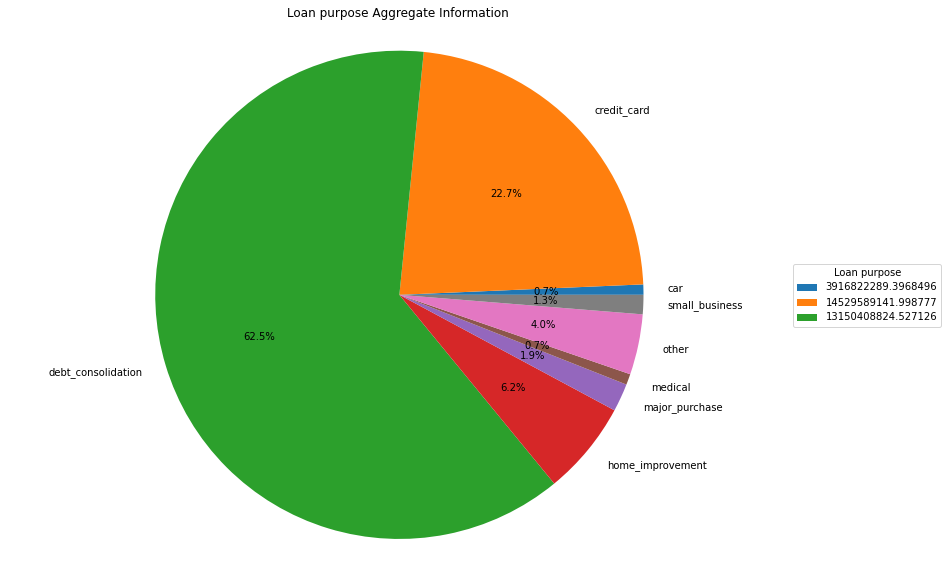

In [8]:
data.loan_purpose()

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=data.acc_df)
plt.show()